# Project Purpose: Identifying 5 High-Potential Round Trip Routes for Investment in the US Domestic Market 

In [140]:
#importing required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [541]:
#importing data
flights = pd.read_csv("Data/Flights.csv")

/var/folders/rh/g8l282js2sn6536twywcwxvh0000gn/T/ipykernel_24170/265302845.py:2: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv("Data/Flights.csv")


In [630]:
tickets = pd.read_csv("Data/Tickets.csv")

In [265]:
airport_codes = pd.read_csv("Data/Airport_Codes.csv")

## Data Clean

### Dataset Filtering

In [269]:
#Keeping only medium or large airport
airport_codes = airport_codes[(airport_codes['TYPE']== 'medium_airport')|(airport_codes['TYPE']== 'large_airport')]

In [267]:
#Keep only US airport
airport_codes = airport_codes[(airport_codes['ISO_COUNTRY']== 'US')]

In [684]:
airport_codes.shape

(858, 8)

In [560]:
#Keeping flights that are not cancelled.
flights = flights[flights['CANCELLED'] == 0]

### Handle missing value and outliers

In [542]:
flights.dtypes
#flights.describe()

FL_DATE               object
OP_CARRIER            object
TAIL_NUM              object
OP_CARRIER_FL_NUM     object
ORIGIN_AIRPORT_ID      int64
ORIGIN                object
ORIGIN_CITY_NAME      object
DEST_AIRPORT_ID        int64
DESTINATION           object
DEST_CITY_NAME        object
DEP_DELAY            float64
ARR_DELAY            float64
CANCELLED            float64
AIR_TIME              object
DISTANCE              object
OCCUPANCY_RATE       float64
dtype: object

In [146]:
flights.shape

(1864272, 16)

In [147]:
flights.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [148]:
flights.describe()

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,OCCUPANCY_RATE
count,1.864272e+06,1.864272e+06,1.864272e+06,1.859895e+06,1864272.0,1.863962e+06
mean,1.268580e+04,1.268710e+04,1.076992e+01,5.648737e+00,0.0,6.502411e-01
std,1.522326e+03,1.521973e+03,5.006924e+01,5.241170e+01,0.0,2.020016e-01
min,1.013500e+04,1.013500e+04,-6.300000e+01,-9.400000e+01,0.0,3.000000e-01
25%,1.129200e+04,1.129200e+04,-6.000000e+00,-1.500000e+01,0.0,4.800000e-01
50%,1.288900e+04,1.288900e+04,-2.000000e+00,-6.000000e+00,0.0,6.500000e-01
75%,1.405700e+04,1.405700e+04,7.000000e+00,8.000000e+00,0.0,8.300000e-01
max,1.621800e+04,1.621800e+04,2.941000e+03,2.923000e+03,0.0,1.000000e+00


In [149]:
flights.isna().sum()

FL_DATE                 0
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY            4377
CANCELLED               0
AIR_TIME             5027
DISTANCE              610
OCCUPANCY_RATE        310
dtype: int64

In [1336]:
# Convert AIR_TIME and DISTANCE from object to float64
#Replace non-numeric values with NaN
#flights['DISTANCE'] = pd.to_numeric(flights['DISTANCE'], errors='coerce')
flights['DISTANCE'] = flights['DISTANCE'].astype(float)
# have string records 'Hundred'

# Checking the changed data types
#print(flights.dtypes)

In [543]:
# Step 1: Convert 'DISTANCE' column to numeric, coercing errors
flights['DISTANCE_NUM'] = pd.to_numeric(flights['DISTANCE'], errors='coerce')

# Step 2: Find and print rows where 'DISTANCE_NUM' is NaN
non_numeric_records = flights[flights['DISTANCE_NUM'].isna()]
print(non_numeric_records)

         FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
1910839   1/2/19         UA   N782SA              5656              14635   
1910858  3/22/19         AA   N891NN              1403              10821   
1910859  3/23/19         AA   N357PV              1403              10821   
1910860  3/24/19         AA   N990AN              1403              10821   
1910861  3/25/19         AA   N919NN              1403              10821   
...          ...        ...      ...               ...                ...   
1915881  3/23/19         AA   N903NN              1433              15370   
1915882  3/24/19         AA   N965AN              1433              15370   
1915883  3/25/19         AA   N979NN              1433              15370   
1915884  3/26/19         AA   N872NN              1433              15370   
1915885  3/27/19         AA   N945AN              1433              15370   

        ORIGIN ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION  \
1910839    

In [561]:
flights['DISTANCE_NUM'].describe()

count    1.864272e+06
mean     7.728844e+02
std      5.823237e+02
min      2.000000e+00
25%      3.440000e+02
50%      6.120000e+02
75%      1.013000e+03
max      9.898000e+03
Name: DISTANCE_NUM, dtype: float64

In [545]:
#show the negative distance record: 220 rows 
flights[flights['DISTANCE_NUM']< 0]

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,DISTANCE_NUM
1910957,3/6/19,AA,N943NN,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-5.0,6.0,0.0,NaN,-1947,0.477301,-1947.0
1910958,3/7/19,AA,N306PB,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-1.0,-10.0,0.0,NaN,-1947,0.515156,-1947.0
1910959,3/8/19,AA,N970AN,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",24.0,41.0,0.0,NaN,-1947,0.493234,-1947.0
1910960,3/9/19,AA,N925NN,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-5.0,16.0,0.0,NaN,-1947,0.559034,-1947.0
1910961,3/10/19,AA,N957AN,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-3.0,-14.0,0.0,NaN,-1947,0.739514,-1947.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915521,3/19/19,AA,N960AN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",4.0,1.0,0.0,123,-198,0.666987,-198.0
1915522,3/20/19,AA,N870NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-7.0,-28.0,0.0,121,-198,0.521943,-198.0
1915523,3/21/19,AA,N841NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-4.0,-19.0,0.0,112,-198,0.801774,-198.0
1915524,3/22/19,AA,N886NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-7.0,-33.0,0.0,117,-198,0.848048,-198.0


In [562]:
# change AA's negative distance and air_time to positive
flights['DISTANCE_NUM'] = flights['DISTANCE_NUM'].abs()

In [563]:
# Calculate the average distance for each combination of 'ORIGIN' and 'DESTINATION'
# and fill missing values in 'DISTANCE_NUM' with these averages
average_distance = flights.groupby(['ORIGIN', 'DESTINATION'])['DISTANCE_NUM'].mean().reset_index()
average_distance

,ORIGIN,DESTINATION,DISTANCE_NUM
0,ABE,ATL,692.0
1,ABE,CLT,481.0
2,ABE,DTW,425.0
3,ABE,FLL,1041.0
4,ABE,ORD,654.0
...,...,...,...
5912,YAK,CDV,213.0
5913,YAK,JNU,198.0
5914,YKM,SEA,103.0
5915,YUM,DFW,1022.0


In [564]:
# Calculate the average distance for each combination of 'ORIGIN' and 'DESTINATION'
# and fill missing values in 'AIR_TIME_NUM' with these averages
flights['DISTANCE_NUM'] = flights.groupby(['ORIGIN', 'DESTINATION'])['DISTANCE_NUM'].transform(lambda x: x.fillna(x.mean()))

In [565]:
# data check no na record.
# Step 2: Find and print rows where 'DISTANCE_NUM' is NaN
non_numeric_records = flights[flights['DISTANCE_NUM'].isna()]
print(non_numeric_records)


Empty DataFrame
Columns: [FL_DATE, OP_CARRIER, TAIL_NUM, OP_CARRIER_FL_NUM, ORIGIN_AIRPORT_ID, ORIGIN, ORIGIN_CITY_NAME, DEST_AIRPORT_ID, DESTINATION, DEST_CITY_NAME, DEP_DELAY, ARR_DELAY, CANCELLED, AIR_TIME, DISTANCE, OCCUPANCY_RATE, DISTANCE_NUM, AIR_TIME_NUM]
Index: []


In [1334]:
#convert AIR_TIME from float to int
#flights['AIR_TIME'] = flights['AIR_TIME'].astype(float)
#could not convert string to float: 'Two'

In [566]:
# Step 1: Convert 'AIR_TIME' column to numeric, coercing errors
flights['AIR_TIME_NUM'] = pd.to_numeric(flights['AIR_TIME'], errors='coerce')

# Step 2: Find and print rows where 'AIR_TIME' is NaN
non_numeric_records = flights[flights['AIR_TIME'].isna()]
print(non_numeric_records)

            FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
618      2019-03-03         WN   N7820L              2367              10397   
824      2019-03-03         WN   N700GS              2423              10693   
1504     2019-03-09         WN   N743SW              5433              11481   
1543     2019-03-09         WN   N940WN              3221              11697   
1683     2019-03-09         WN   N208WN              5483              12191   
...             ...        ...      ...               ...                ...   
1915504      3/8/19         AA   N970AN              1409              10397   
1915505      3/9/19         AA   N925NN              1409              10397   
1915506     3/10/19         AA   N957AN              1409              10397   
1915507     3/11/19         AA   N979NN              1409              10397   
1915794      3/6/19         AA   N152AA              1430              11298   

        ORIGIN       ORIGIN_CITY_NAME  

In [567]:
flights['AIR_TIME_NUM'].describe()

count    1.857415e+06
mean     1.093867e+02
std      7.046901e+01
min     -1.210000e+02
25%      5.900000e+01
50%      9.100000e+01
75%      1.390000e+02
max      2.222000e+03
Name: AIR_TIME_NUM, dtype: float64

In [568]:
flights[flights['AIR_TIME_NUM']< 0]
#flights[(flights['AIR_TIME_NUM'] < 0) & (flights['OP_CARRIER'] == 'AA')]
#100 rows negative number all from AA

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,DISTANCE_NUM,AIR_TIME_NUM
1910965,3/8/19,AA,N997NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",4.0,-9.0,0,-121,-198,0.336533,198.0,-121.0
1910966,3/9/19,AA,N996NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-5.0,1.0,0,-121,-198,0.824739,198.0,-121.0
1910967,3/10/19,AA,N909AN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-2.0,-12.0,0,-121,-198,0.964975,198.0,-121.0
1910968,3/11/19,AA,N813NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-3.0,-20.0,0,-121,-198,0.371960,198.0,-121.0
1910969,3/12/19,AA,N865NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-2.0,-9.0,0,-121,-198,0.313141,198.0,-121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915515,3/13/19,AA,N909AN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-1.0,-19.0,0,-121,-198,0.325361,198.0,-121.0
1915516,3/14/19,AA,N861NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",41.0,35.0,0,-121,-198,0.766246,198.0,-121.0
1915517,3/15/19,AA,N958NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-5.0,20.0,0,-121,-198,0.866433,198.0,-121.0
1915518,3/16/19,AA,N910NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",4.0,4.0,0,-121,-198,0.689851,198.0,-121.0


In [569]:
# Correct the negtive airtime mentioned above
flights['AIR_TIME_NUM'] = flights['AIR_TIME_NUM'].abs()

In [570]:
# Calculate the average distance for each combination of 'ORIGIN' and 'DESTINATION'
# and fill missing values in 'AIR_TIME_NUM' with these averages
flights['AIR_TIME_NUM'] = flights.groupby(['ORIGIN', 'DESTINATION'])['AIR_TIME_NUM'].transform(lambda x: x.fillna(x.mean()))

In [580]:
#fill other NA with no match with mean
flights['AIR_TIME_NUM'].fillna(flights['AIR_TIME_NUM'].mean(), inplace=True)

In [583]:
flights.isna().sum()

FL_DATE                 0
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY               0
CANCELLED               0
AIR_TIME             5027
DISTANCE              610
OCCUPANCY_RATE          0
DISTANCE_NUM            0
AIR_TIME_NUM            0
dtype: int64

In [581]:
flights['AIR_TIME_NUM'].describe()

count    1.864272e+06
mean     1.094631e+02
std      7.048473e+01
min      1.000000e+00
25%      5.900000e+01
50%      9.100000e+01
75%      1.390000e+02
max      2.222000e+03
Name: AIR_TIME_NUM, dtype: float64

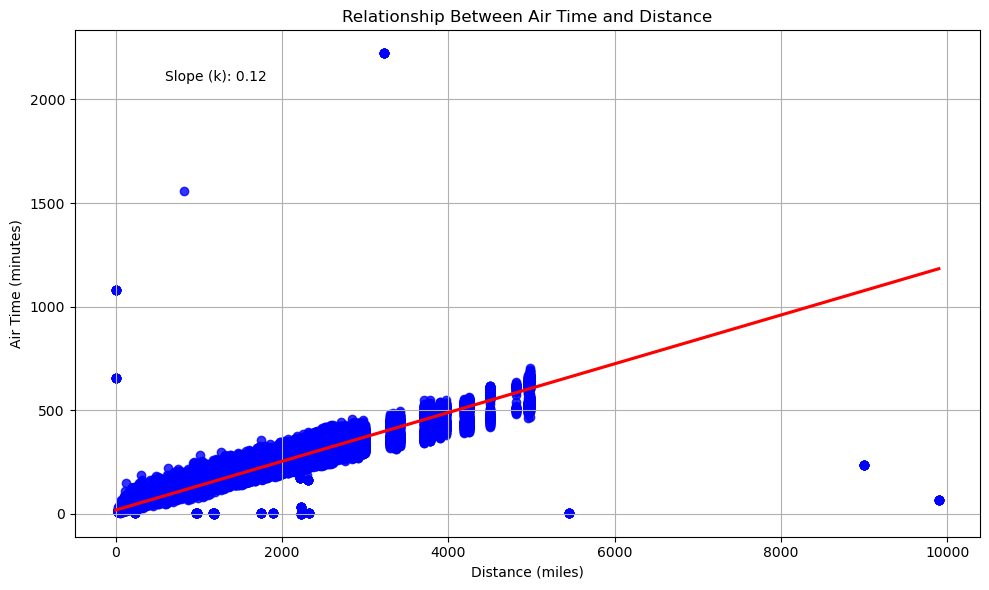

In [1121]:
# Calculate the correlation between AIR_TIME_NUM and DISTANCE_NUM

correlation = flights['AIR_TIME_NUM'].corr(flights['DISTANCE_NUM'])

# Create scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='DISTANCE_NUM', y='AIR_TIME_NUM', data=flights, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')
plt.title('Relationship Between Air Time and Distance')
plt.grid(True)

# Display slope (k) on the plot
plt.text(0.1, 0.9, f'Slope (k): {slope:.2f}', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

#for every additional mile of distance, the air time increases by approximately 0.12 minutes.

In [1123]:
from sklearn.linear_model import LinearRegression

# Assuming 'flights' is your DataFrame
df = flights

# Define the independent variable (X) and dependent variable (Y)
X = df[['DISTANCE_NUM']]  # Note: X should be a 2D array
Y = df['AIR_TIME_NUM']

# Fit the linear regression model
model = LinearRegression().fit(X, Y)

# Print the slope and intercept
print(f'Slope (k): {slope:.2f}')
print(f'Intercept: {intercept:.2f}')

Slope (k): 0.12
Intercept: 18.54


In [1333]:
#flights.describe()

In [720]:
# impute missing occupancy rate with median value given the outlier.
# Replace NA values in the OCCUPANCY_RATE column with the median value
flights['OCCUPANCY_RATE'].fillna(flights['OCCUPANCY_RATE'].median(), inplace=True)

In [721]:
#replace early departure flights with "on time" 
flights.loc[flights['DEP_DELAY'] < 0, 'DEP_DELAY'] = 0

In [722]:
#replace delay times greater than 12 hours with a maximum value of 12 hours 
flights.loc[flights['DEP_DELAY'] > 720, 'DEP_DELAY'] = 720
flights.loc[flights['ARR_DELAY'] > 720, 'ARR_DELAY'] = 720

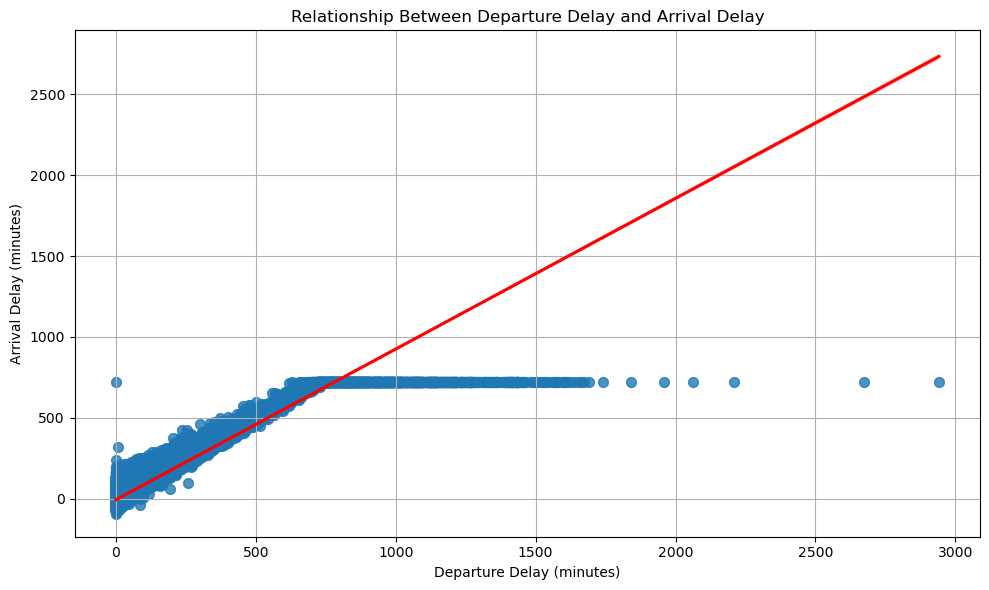

In [536]:
#visualize the relationship between departure delay and arrival delay
plt.figure(figsize=(10, 6))
sns.regplot(x='DEP_DELAY', y='ARR_DELAY', data=flights, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Correlation Between Departure Delay and Arrival Delay')
plt.grid(True)
plt.tight_layout()
plt.show()



### The Graph shows a direct, one-to-one relationship between Departure delay time and Arrival delay time for Dep_delay < 750 mins.

In [1064]:
# Fill missing ARR_DELAY values with the corresponding DEP_DELAY values
flights['ARR_DELAY'] = flights['ARR_DELAY'].fillna(flights['DEP_DELAY'])

### Data Exploration and Processing - Tickets Dataset

In [631]:
tickets.describe()

,ITIN_ID,YEAR,QUARTER,ROUNDTRIP,PASSENGERS
count,1.167285e+06,1167285.0,1167285.0,1.167285e+06,1.165308e+06
mean,1.715602e+11,2019.0,1.0,6.070497e-01,2.070102e+00
std,6.834957e+10,0.0,0.0,4.884062e-01,5.840215e+00
min,2.019120e+05,2019.0,1.0,0.000000e+00,1.000000e+00
25%,2.019115e+11,2019.0,1.0,0.000000e+00,1.000000e+00
50%,2.019128e+11,2019.0,1.0,1.000000e+00,1.000000e+00
75%,2.019140e+11,2019.0,1.0,1.000000e+00,1.000000e+00
max,2.019153e+11,2019.0,1.0,1.000000e+00,7.690000e+02


In [632]:
tickets.dtypes

ITIN_ID                int64
YEAR                   int64
QUARTER                int64
ORIGIN                object
ORIGIN_COUNTRY        object
ORIGIN_STATE_ABR      object
ORIGIN_STATE_NM       object
ROUNDTRIP            float64
REPORTING_CARRIER     object
PASSENGERS           float64
ITIN_FARE             object
DESTINATION           object
dtype: object

In [1069]:
# keep round trip only
tickets = tickets[tickets['ROUNDTRIP'] == 1]

In [1070]:
# >75% records with only one passenger in the flight
tickets.describe()

,ITIN_ID,YEAR,QUARTER,ROUNDTRIP,PASSENGERS
count,7.086000e+05,708600.0,708600.0,708600.0,707403.000000
mean,1.733027e+11,2019.0,1.0,1.0,1.936837
std,6.682374e+10,0.0,0.0,0.0,5.040905
min,2.019119e+06,2019.0,1.0,1.0,1.000000
25%,2.019116e+11,2019.0,1.0,1.0,1.000000
50%,2.019128e+11,2019.0,1.0,1.0,1.000000
75%,2.019140e+11,2019.0,1.0,1.0,1.000000
max,2.019153e+11,2019.0,1.0,1.0,681.000000


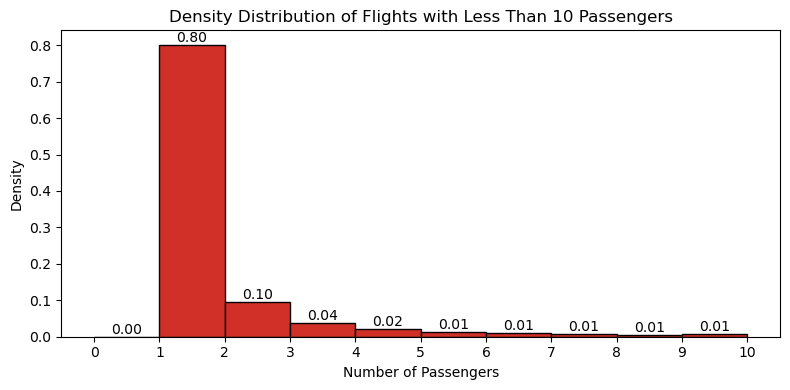

In [1082]:
import matplotlib.pyplot as plt

# Plot the density distribution of 'PASSENGERS'
plt.figure(figsize=(8, 4))
n, bins, patches = plt.hist(tickets['PASSENGERS'], bins=range(11), density=True, color='#d03027', edgecolor='black')
plt.xlabel('Number of Passengers')
plt.ylabel('Density')
plt.title('Density Distribution of Flights with Less Than 10 Passengers')
plt.xticks(ticks=range(11))  # Set x-ticks from 0 to 9

# Adding density labels on the bars
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(n, bin_centers):
    plt.text(x, count, f'{count:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Findings from the Histogram：
### 1. The vast majority of flights (80%) in the dataset carry only 1 passenger. 
### 2. Flights with 5 or more passengers are quite rare, with densities below 0.01. 

In [1071]:
# Checking missing value.
tickets.isna().sum()

ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
ROUNDTRIP               0
REPORTING_CARRIER       0
PASSENGERS           1197
ITIN_FARE             560
DESTINATION             0
dtype: int64

In [1072]:
# data description
tickets.describe()

,ITIN_ID,YEAR,QUARTER,ROUNDTRIP,PASSENGERS
count,7.086000e+05,708600.0,708600.0,708600.0,707403.000000
mean,1.733027e+11,2019.0,1.0,1.0,1.936837
std,6.682374e+10,0.0,0.0,0.0,5.040905
min,2.019119e+06,2019.0,1.0,1.0,1.000000
25%,2.019116e+11,2019.0,1.0,1.0,1.000000
50%,2.019128e+11,2019.0,1.0,1.0,1.000000
75%,2.019140e+11,2019.0,1.0,1.0,1.000000
max,2.019153e+11,2019.0,1.0,1.0,681.000000


In [636]:
# I assume a typical flight should have between 40 and 400 passengers. Values outside this range are considered outliers
tickets_remove_outlier_passenger = tickets[(tickets['PASSENGERS'] > 40) & (tickets['PASSENGERS'] < 400)]

In [1076]:
tickets[(tickets['PASSENGERS'] > 40) & (tickets['PASSENGERS'] < 400)]
# 1478 valid rows 

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
3919,201911110149,2019,1,ADQ,US,AK,Alaska,1.0,AS,53.0,11.0,ANC
5919,201911124541,2019,1,BET,US,AK,Alaska,1.0,AS,192.0,384.0,ANC
20475,201913769078,2019,1,GUM,US,TT,U.S. Pacific Trust Territories and Possessions,1.0,UA,122.0,244.0,SPN
23638,201912906498,2019,1,IAG,US,NY,New York,1.0,NK,51.0,53.0,FLL
23964,201912906479,2019,1,IAG,US,NY,New York,1.0,NK,61.0,29.0,FLL
...,...,...,...,...,...,...,...,...,...,...,...,...
1151901,201912714753,2019,1,PPG,US,TT,U.S. Pacific Trust Territories and Possessions,1.0,HA,72.0,1666.0,HNL
1152495,201911445173,2019,1,PSE,US,PR,Puerto Rico,1.0,B6,73.0,192.0,MCO
1161388,201914226671,2019,1,SPN,US,TT,U.S. Pacific Trust Territories and Possessions,1.0,UA,72.0,232.0,GUM
1161394,201914226670,2019,1,SPN,US,TT,U.S. Pacific Trust Territories and Possessions,1.0,UA,80.0,230.0,GUM


In [1086]:
tickets_remove_outlier_passenger.describe()
#average passenger per flight is 74

,ITIN_ID,YEAR,QUARTER,ROUNDTRIP,PASSENGERS
count,1.478000e+03,1478.0,1478.0,1478.0,1478.000000
mean,1.845774e+11,2019.0,1.0,1.0,74.822057
std,5.340171e+10,0.0,0.0,0.0,47.747688
min,2.019113e+10,2019.0,1.0,1.0,41.000000
25%,2.019117e+11,2019.0,1.0,1.0,47.000000
50%,2.019136e+11,2019.0,1.0,1.0,59.000000
75%,2.019146e+11,2019.0,1.0,1.0,81.000000
max,2.019152e+11,2019.0,1.0,1.0,398.000000


### Data Exploration and Processing - Airport Dataset

In [271]:
airport_codes.shape

(858, 8)

In [272]:
# 37 airports in US with missing IATA_CODE
airport_codes.isna().sum()

TYPE              0
NAME              0
ELEVATION_FT      3
CONTINENT       858
ISO_COUNTRY       0
MUNICIPALITY      3
IATA_CODE        37
COORDINATES       0
dtype: int64

In [1339]:
# airport_codes.shape

# 37 airports in US with missing IATA_CODE
airport_codes.isna().sum()

# I don't consider these airport with missing IATA_CODE in my analysis after glance
# airport_codes[airport_codes['IATA_CODE'].isna()]

TYPE              0
NAME              0
ELEVATION_FT      3
CONTINENT       858
ISO_COUNTRY       0
MUNICIPALITY      3
IATA_CODE        37
COORDINATES       0
dtype: int64

In [1087]:
# impute the average passenger number to outliers
tickets.loc[(tickets['PASSENGERS'] <= 40) | (tickets['PASSENGERS'] >= 400) | (tickets['PASSENGERS'].isna()), 'PASSENGERS'] = 74

In [1088]:
# convert datatype
tickets['PASSENGERS'] = tickets['PASSENGERS'].astype(int)

In [1089]:
tickets.isna().sum()

ITIN_ID                0
YEAR                   0
QUARTER                0
ORIGIN                 0
ORIGIN_COUNTRY         0
ORIGIN_STATE_ABR       0
ORIGIN_STATE_NM        0
ROUNDTRIP              0
REPORTING_CARRIER      0
PASSENGERS             0
ITIN_FARE            560
DESTINATION            0
dtype: int64

In [1090]:
#tickets['ITIN_FARE'] = tickets['ITIN_FARE'].astype(float)
# Error：Remove non-numeric characters from ITIN_FARE
tickets['ITIN_FARE'] = tickets['ITIN_FARE'].replace('[\$,]', '', regex=True).astype(float)

In [1092]:
# Assume the typical price range for a round-trip domestic flight in the United State is $100~$800, 
# Average cost of a domestic round-trip flight is approximately $368，impute missing value with $368 per round trip.

tickets.loc[(tickets['ITIN_FARE'] < 100),'ITIN_FARE'] = 100
tickets.loc[(tickets['ITIN_FARE'] > 800),'ITIN_FARE'] = 800 
tickets.loc[tickets['ITIN_FARE'].isna(), 'ITIN_FARE'] = 368

In [1097]:
print(tickets.isna().sum())
print(tickets.dtypes)
#Comfirm there is no missing value and datatype is correct.

ITIN_ID              0
YEAR                 0
QUARTER              0
ORIGIN               0
ORIGIN_COUNTRY       0
ORIGIN_STATE_ABR     0
ORIGIN_STATE_NM      0
ROUNDTRIP            0
REPORTING_CARRIER    0
PASSENGERS           0
ITIN_FARE            0
DESTINATION          0
dtype: int64
ITIN_ID                int64
YEAR                   int64
QUARTER                int64
ORIGIN                object
ORIGIN_COUNTRY        object
ORIGIN_STATE_ABR      object
ORIGIN_STATE_NM       object
ROUNDTRIP            float64
REPORTING_CARRIER     object
PASSENGERS             int64
ITIN_FARE            float64
DESTINATION           object
dtype: object


In [1128]:
# show dataset description
tickets.describe()

,ITIN_ID,YEAR,QUARTER,ROUNDTRIP,PASSENGERS,ITIN_FARE
count,7.086000e+05,708600.0,708600.0,708600.0,708600.000000,708600.000000
mean,1.733027e+11,2019.0,1.0,1.0,74.001715,440.083788
std,6.682374e+10,0.0,0.0,0.0,2.180251,212.465522
min,2.019119e+06,2019.0,1.0,1.0,41.000000,100.000000
25%,2.019116e+11,2019.0,1.0,1.0,74.000000,279.000000
50%,2.019128e+11,2019.0,1.0,1.0,74.000000,415.000000
75%,2.019140e+11,2019.0,1.0,1.0,74.000000,596.000000
max,2.019153e+11,2019.0,1.0,1.0,398.000000,800.000000


In [1098]:
flight_counts = tickets.groupby(['ORIGIN', 'DESTINATION']).size().reset_index(name = 'FLIGHT_COUNT')

In [1100]:
flight_counts

,ORIGIN,DESTINATION,FLIGHT_COUNT
0,ABE,ABQ,2
1,ABE,AGS,1
2,ABE,AMA,1
3,ABE,ASE,2
4,ABE,ATL,52
...,...,...,...
40285,YUM,SMF,2
40286,YUM,SRQ,1
40287,YUM,TOL,2
40288,YUM,TPA,3


In [1102]:
top_10_flight_counts = flight_counts.sort_values(by='FLIGHT_COUNT', ascending=False).head(10)

In [1103]:
top_10_flight_counts

,ORIGIN,DESTINATION,FLIGHT_COUNT
20046,JFK,LAX,876
20108,JFK,SFO,808
28009,ORD,LGA,748
26409,MSP,PHX,742
21121,LAX,JFK,722
28003,ORD,LAX,721
26372,MSP,MCO,720
26430,MSP,RSW,660
22040,LGA,ORD,660
21099,LAX,HNL,654


### Q1: The 10 busiest round trip routes in the quarter

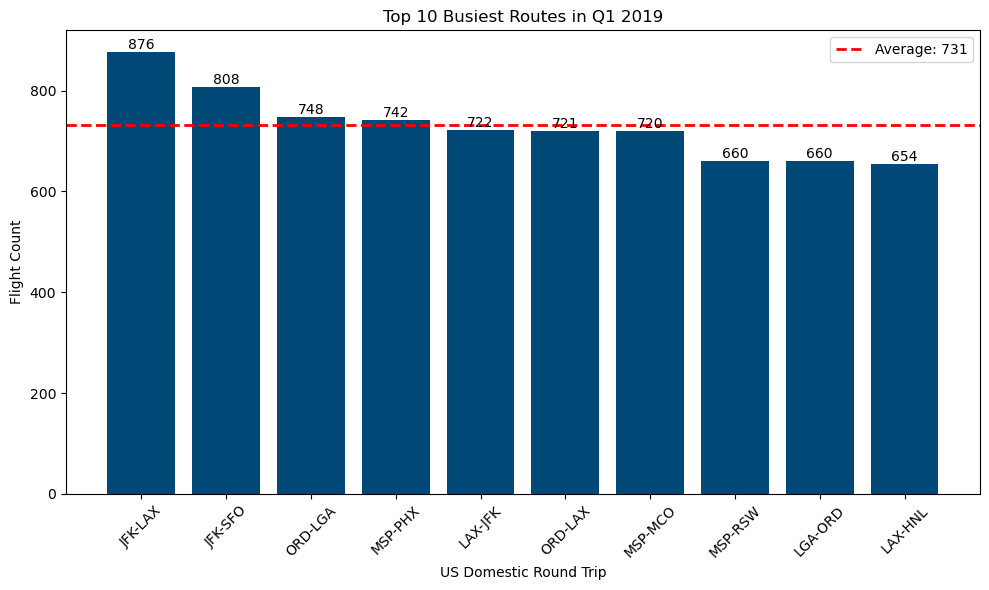

In [1118]:
top_10_flight_counts['ORIGIN_DESTINATION'] = flight_counts['ORIGIN'] + '-' + flight_counts['DESTINATION']

# Calculate the average flight count
average_flight_count = int(top_10_flight_counts['FLIGHT_COUNT'].mean())
# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_flight_counts['ORIGIN_DESTINATION'], top_10_flight_counts['FLIGHT_COUNT'], color= '#004977')
plt.xlabel('US Domestic Round Trip')
plt.ylabel('Flight Count')
plt.title('Top 10 Busiest Routes in Q1 2019')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

# Add the average line
plt.axhline(y=average_flight_count, color='r', linestyle='--', linewidth=2, label=f'Average: {average_flight_count}')

# Add a legend for the average line
plt.legend()

plt.show()

In [1120]:
flights.dtypes

FL_DATE               object
OP_CARRIER            object
TAIL_NUM              object
OP_CARRIER_FL_NUM     object
ORIGIN_AIRPORT_ID      int64
ORIGIN                object
ORIGIN_CITY_NAME      object
DEST_AIRPORT_ID        int64
DESTINATION           object
DEST_CITY_NAME        object
DEP_DELAY            float64
ARR_DELAY            float64
CANCELLED            float64
AIR_TIME              object
DISTANCE              object
OCCUPANCY_RATE       float64
DISTANCE_NUM         float64
AIR_TIME_NUM         float64
dtype: object

### I use flights dataset as my backbone to merge dataset, and obtain key metrics for all routes for analysis

In [717]:
# Grouping flight data by origin and destination, calculate the average values for key metrics for each route.
grouped_flights = flights.groupby(['ORIGIN', 'DESTINATION'])[['DEP_DELAY', 'ARR_DELAY','AIR_TIME_NUM','DISTANCE_NUM','OCCUPANCY_RATE']].mean().reset_index()

In [1131]:
grouped_flights

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,AIR_TIME_NUM,DISTANCE_NUM,OCCUPANCY_RATE
0,ABE,ATL,9.129032,5.460829,107.027650,692.0,0.641567
1,ABE,CLT,9.278884,4.254980,98.972112,481.0,0.665976
2,ABE,DTW,19.391129,10.689516,83.431452,425.0,0.639073
3,ABE,FLL,16.700000,10.850000,145.650000,1041.0,0.580000
4,ABE,ORD,27.163522,15.012579,110.924528,654.0,0.671195
...,...,...,...,...,...,...,...
5912,YAK,CDV,11.301205,0.831325,38.600000,213.0,0.620723
5913,YAK,JNU,8.227273,-12.125000,34.988095,198.0,0.678636
5914,YKM,SEA,14.173770,11.495082,29.016393,103.0,0.660393
5915,YUM,DFW,19.821429,15.464286,127.428571,1022.0,0.637143


In [ ]:
# Calculate the average number of passengers and the average fare for each route (defined by origin and destination airports）
grouped_tickets = tickets.groupby(['ORIGIN', 'DESTINATION'])[['PASSENGERS', 'ITIN_FARE']].mean().reset_index()

In [1130]:
grouped_tickets

,ORIGIN,DESTINATION,PASSENGERS,ITIN_FARE
0,ABE,ABQ,74.0,534.000000
1,ABE,AGS,74.0,299.000000
2,ABE,AMA,74.0,654.000000
3,ABE,ASE,74.0,697.500000
4,ABE,ATL,74.0,496.865385
...,...,...,...,...
40285,YUM,SMF,74.0,276.500000
40286,YUM,SRQ,74.0,696.000000
40287,YUM,TOL,74.0,335.000000
40288,YUM,TPA,74.0,544.333333


### Merge datasets and obtain key metrics for all routes for analysis

In [1132]:
merged_df = pd.merge(grouped_flights, grouped_tickets, on=['ORIGIN', 'DESTINATION'], how='left')

In [1133]:
merged_df.head()

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,AIR_TIME_NUM,DISTANCE_NUM,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE
0,ABE,ATL,9.129032,5.460829,107.027650,692.0,0.641567,74.0,496.865385
1,ABE,CLT,9.278884,4.254980,98.972112,481.0,0.665976,74.0,510.346154
2,ABE,DTW,19.391129,10.689516,83.431452,425.0,0.639073,74.0,386.555556
3,ABE,FLL,16.700000,10.850000,145.650000,1041.0,0.580000,74.0,266.111111
4,ABE,ORD,27.163522,15.012579,110.924528,654.0,0.671195,74.0,567.294118


In [1134]:
merged_df.shape

(5917, 9)

In [1141]:
merged_df_1 = pd.merge(merged_df, flight_counts, on=['ORIGIN', 'DESTINATION'], how='left')

In [1142]:
merged_df_1

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,AIR_TIME_NUM,DISTANCE_NUM,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE,FLIGHT_COUNT
0,ABE,ATL,9.129032,5.460829,107.027650,692.0,0.641567,74.0,496.865385,52.0
1,ABE,CLT,9.278884,4.254980,98.972112,481.0,0.665976,74.0,510.346154,26.0
2,ABE,DTW,19.391129,10.689516,83.431452,425.0,0.639073,74.0,386.555556,9.0
3,ABE,FLL,16.700000,10.850000,145.650000,1041.0,0.580000,74.0,266.111111,54.0
4,ABE,ORD,27.163522,15.012579,110.924528,654.0,0.671195,74.0,567.294118,17.0
...,...,...,...,...,...,...,...,...,...,...
5912,YAK,CDV,11.301205,0.831325,38.600000,213.0,0.620723,74.0,100.000000,2.0
5913,YAK,JNU,8.227273,-12.125000,34.988095,198.0,0.678636,74.0,315.583333,24.0
5914,YKM,SEA,14.173770,11.495082,29.016393,103.0,0.660393,74.0,271.052632,19.0
5915,YUM,DFW,19.821429,15.464286,127.428571,1022.0,0.637143,74.0,459.250000,4.0


In [1143]:
#To ensure profitability, I removed routes with a flight count of zero as they won't generate revenue.
merged_df_1 = merged_df_1.dropna(subset=['FLIGHT_COUNT'])

In [1144]:
merged_df_1

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,AIR_TIME_NUM,DISTANCE_NUM,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE,FLIGHT_COUNT
0,ABE,ATL,9.129032,5.460829,107.027650,692.0,0.641567,74.0,496.865385,52.0
1,ABE,CLT,9.278884,4.254980,98.972112,481.0,0.665976,74.0,510.346154,26.0
2,ABE,DTW,19.391129,10.689516,83.431452,425.0,0.639073,74.0,386.555556,9.0
3,ABE,FLL,16.700000,10.850000,145.650000,1041.0,0.580000,74.0,266.111111,54.0
4,ABE,ORD,27.163522,15.012579,110.924528,654.0,0.671195,74.0,567.294118,17.0
...,...,...,...,...,...,...,...,...,...,...
5912,YAK,CDV,11.301205,0.831325,38.600000,213.0,0.620723,74.0,100.000000,2.0
5913,YAK,JNU,8.227273,-12.125000,34.988095,198.0,0.678636,74.0,315.583333,24.0
5914,YKM,SEA,14.173770,11.495082,29.016393,103.0,0.660393,74.0,271.052632,19.0
5915,YUM,DFW,19.821429,15.464286,127.428571,1022.0,0.637143,74.0,459.250000,4.0


In [1145]:
#Checking there is no missing value for joined_table
merged_df_1.isna().sum()

ORIGIN            0
DESTINATION       0
DEP_DELAY         0
ARR_DELAY         0
AIR_TIME_NUM      0
DISTANCE_NUM      0
OCCUPANCY_RATE    0
PASSENGERS        0
ITIN_FARE         0
FLIGHT_COUNT      0
dtype: int64

In [1152]:
# Join the airport type to exsiting merged table

merged_df_2 = pd.merge(merged_df_1, airport_codes[['IATA_CODE', 'TYPE']], how='left', left_on='ORIGIN', right_on='IATA_CODE')

# Rename the column 'b' to a new name, for example 'city'
merged_df_2 = merged_df_2.rename(columns={'TYPE': 'ORIGIN_AIRPORT_SIZE'})

# Select only the required columns
merged_df_2 = merged_df_2[joined_table.columns.tolist() + ['ORIGIN_AIRPORT_SIZE']]


In [1153]:
merged_df_2

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,AIR_TIME_NUM,DISTANCE_NUM,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE,FLIGHT_COUNT,ORIGIN_AIRPORT_SIZE
0,ABE,ATL,9.129032,5.460829,107.027650,692.0,0.641567,74.0,496.865385,52.0,medium_airport
1,ABE,CLT,9.278884,4.254980,98.972112,481.0,0.665976,74.0,510.346154,26.0,medium_airport
2,ABE,DTW,19.391129,10.689516,83.431452,425.0,0.639073,74.0,386.555556,9.0,medium_airport
3,ABE,FLL,16.700000,10.850000,145.650000,1041.0,0.580000,74.0,266.111111,54.0,medium_airport
4,ABE,ORD,27.163522,15.012579,110.924528,654.0,0.671195,74.0,567.294118,17.0,medium_airport
...,...,...,...,...,...,...,...,...,...,...,...
5793,YAK,CDV,11.301205,0.831325,38.600000,213.0,0.620723,74.0,100.000000,2.0,medium_airport
5794,YAK,JNU,8.227273,-12.125000,34.988095,198.0,0.678636,74.0,315.583333,24.0,medium_airport
5795,YKM,SEA,14.173770,11.495082,29.016393,103.0,0.660393,74.0,271.052632,19.0,medium_airport
5796,YUM,DFW,19.821429,15.464286,127.428571,1022.0,0.637143,74.0,459.250000,4.0,medium_airport


In [1150]:
merged_df_2.shape

(5798, 11)

In [1154]:
# Join the airport type to exsiting merged table
merged_df_3 = pd.merge(merged_df_2, airport_codes[['IATA_CODE', 'TYPE']], how='left', left_on='DESTINATION', right_on='IATA_CODE')

# Rename the column 'b' to a new name, for example 'city'
merged_df_3 = merged_df_3.rename(columns={'TYPE': 'DESTINATION_AIRPORT_SIZE'})

# Select only the required columns
merged_df_3 = merged_df_3[merged_df_2.columns.tolist() + ['DESTINATION_AIRPORT_SIZE']]

In [1155]:
merged_df_3

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,AIR_TIME_NUM,DISTANCE_NUM,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE,FLIGHT_COUNT,ORIGIN_AIRPORT_SIZE,DESTINATION_AIRPORT_SIZE
0,ABE,ATL,9.129032,5.460829,107.027650,692.0,0.641567,74.0,496.865385,52.0,medium_airport,large_airport
1,ABE,CLT,9.278884,4.254980,98.972112,481.0,0.665976,74.0,510.346154,26.0,medium_airport,large_airport
2,ABE,DTW,19.391129,10.689516,83.431452,425.0,0.639073,74.0,386.555556,9.0,medium_airport,large_airport
3,ABE,FLL,16.700000,10.850000,145.650000,1041.0,0.580000,74.0,266.111111,54.0,medium_airport,large_airport
4,ABE,ORD,27.163522,15.012579,110.924528,654.0,0.671195,74.0,567.294118,17.0,medium_airport,large_airport
...,...,...,...,...,...,...,...,...,...,...,...,...
5793,YAK,CDV,11.301205,0.831325,38.600000,213.0,0.620723,74.0,100.000000,2.0,medium_airport,medium_airport
5794,YAK,JNU,8.227273,-12.125000,34.988095,198.0,0.678636,74.0,315.583333,24.0,medium_airport,medium_airport
5795,YKM,SEA,14.173770,11.495082,29.016393,103.0,0.660393,74.0,271.052632,19.0,medium_airport,large_airport
5796,YUM,DFW,19.821429,15.464286,127.428571,1022.0,0.637143,74.0,459.250000,4.0,medium_airport,large_airport


In [1156]:
merged_df_3.isna().sum()

ORIGIN                        0
DESTINATION                   0
DEP_DELAY                     0
ARR_DELAY                     0
AIR_TIME_NUM                  0
DISTANCE_NUM                  0
OCCUPANCY_RATE                0
PASSENGERS                    0
ITIN_FARE                     0
FLIGHT_COUNT                  0
ORIGIN_AIRPORT_SIZE         143
DESTINATION_AIRPORT_SIZE    140
dtype: int64

In [1161]:
# airport_codes.shape

# 37 airports in US with missing IATA_CODE
print(airport_codes.isna().sum())

# I don't consider these airport with missing IATA_CODE in my analysis after quick glance
print(airport_codes[airport_codes['IATA_CODE'].isna()])

TYPE              0
NAME              0
ELEVATION_FT      3
CONTINENT       858
ISO_COUNTRY       0
MUNICIPALITY      3
IATA_CODE        37
COORDINATES       0
dtype: int64
                 TYPE                                               NAME  \
25963  medium_airport  South Alabama Regional At Bill Benton Field Ai...   
27145  medium_airport                              Shelby County Airport   
27517  medium_airport                        Wheeler Sack Army Air Field   
27648  medium_airport                                     Hurlburt Field   
27685  medium_airport                        San Marcos Regional Airport   
27822  medium_airport                             Julian Carroll Airport   
27979  medium_airport                   Monticello Municipal Ellis Field   
28221  medium_airport                     Mc Minnville Municipal Airport   
28345  medium_airport                      Beaufort MCAS - Merritt Field   
28348  medium_airport        New River MCAS /H/ /Mccutcheon Fld/ Ai

In [1168]:
# drop route with no IATA_CODE records: Further improvement
merged_df_4 = merged_df_3.dropna(subset=['ORIGIN_AIRPORT_SIZE'])
merged_df_4 = merged_df_4.dropna(subset=['DESTINATION_AIRPORT_SIZE'])

In [1173]:
# Comfirm no missing value
merged_df_4.isna().sum()

ORIGIN                      0
DESTINATION                 0
DEP_DELAY                   0
ARR_DELAY                   0
AIR_TIME_NUM                0
DISTANCE_NUM                0
OCCUPANCY_RATE              0
PASSENGERS                  0
ITIN_FARE                   0
FLIGHT_COUNT                0
ORIGIN_AIRPORT_SIZE         0
DESTINATION_AIRPORT_SIZE    0
dtype: int64

In [1174]:
merged_df_4.dtypes

ORIGIN                       object
DESTINATION                  object
DEP_DELAY                   float64
ARR_DELAY                   float64
AIR_TIME_NUM                float64
DISTANCE_NUM                float64
OCCUPANCY_RATE              float64
PASSENGERS                  float64
ITIN_FARE                   float64
FLIGHT_COUNT                float64
ORIGIN_AIRPORT_SIZE          object
DESTINATION_AIRPORT_SIZE     object
dtype: object

In [1175]:
# Adding the new column 'Revenue' to the df
df = merged_df_4.copy()

df.loc[:, 'REVENUE'] = (200 * df['OCCUPANCY_RATE'] * df['ITIN_FARE'] +
                             70 * 200 * df['OCCUPANCY_RATE'] * 0.5)

In [1176]:
df.head()

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,AIR_TIME_NUM,DISTANCE_NUM,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE,FLIGHT_COUNT,ORIGIN_AIRPORT_SIZE,DESTINATION_AIRPORT_SIZE,REVENUE
0,ABE,ATL,9.129032,5.460829,107.027650,692.0,0.641567,74.0,496.865385,52.0,medium_airport,large_airport,68245.436725
1,ABE,CLT,9.278884,4.254980,98.972112,481.0,0.665976,74.0,510.346154,26.0,medium_airport,large_airport,72637.500460
2,ABE,DTW,19.391129,10.689516,83.431452,425.0,0.639073,74.0,386.555556,9.0,medium_airport,large_airport,53880.919355
3,ABE,FLL,16.700000,10.850000,145.650000,1041.0,0.580000,74.0,266.111111,54.0,medium_airport,large_airport,34928.888889
4,ABE,ORD,27.163522,15.012579,110.924528,654.0,0.671195,74.0,567.294118,17.0,medium_airport,large_airport,80851.356271


In [1177]:
return_trip = df.copy()
return_trip[['ORIGIN', 'DESTINATION']] = return_trip[['DESTINATION', 'ORIGIN']]
return_trip

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,AIR_TIME_NUM,DISTANCE_NUM,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE,FLIGHT_COUNT,ORIGIN_AIRPORT_SIZE,DESTINATION_AIRPORT_SIZE,REVENUE
0,ATL,ABE,9.129032,5.460829,107.027650,692.0,0.641567,74.0,496.865385,52.0,medium_airport,large_airport,68245.436725
1,CLT,ABE,9.278884,4.254980,98.972112,481.0,0.665976,74.0,510.346154,26.0,medium_airport,large_airport,72637.500460
2,DTW,ABE,19.391129,10.689516,83.431452,425.0,0.639073,74.0,386.555556,9.0,medium_airport,large_airport,53880.919355
3,FLL,ABE,16.700000,10.850000,145.650000,1041.0,0.580000,74.0,266.111111,54.0,medium_airport,large_airport,34928.888889
4,ORD,ABE,27.163522,15.012579,110.924528,654.0,0.671195,74.0,567.294118,17.0,medium_airport,large_airport,80851.356271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,CDV,YAK,11.301205,0.831325,38.600000,213.0,0.620723,74.0,100.000000,2.0,medium_airport,medium_airport,16759.518072
5794,JNU,YAK,8.227273,-12.125000,34.988095,198.0,0.678636,74.0,315.583333,24.0,medium_airport,medium_airport,47583.719697
5795,SEA,YKM,14.173770,11.495082,29.016393,103.0,0.660393,74.0,271.052632,19.0,medium_airport,large_airport,40423.030198
5796,DFW,YUM,19.821429,15.464286,127.428571,1022.0,0.637143,74.0,459.250000,4.0,medium_airport,large_airport,62981.571429


In [1178]:
temp_df = pd.merge(df, return_trip[['ORIGIN', 'DESTINATION', 'DEP_DELAY', 'ARR_DELAY']], on=['ORIGIN', 'DESTINATION'], how='left')
temp_df

,ORIGIN,DESTINATION,DEP_DELAY_x,ARR_DELAY_x,AIR_TIME_NUM,DISTANCE_NUM,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE,FLIGHT_COUNT,ORIGIN_AIRPORT_SIZE,DESTINATION_AIRPORT_SIZE,REVENUE,DEP_DELAY_y,ARR_DELAY_y
0,ABE,ATL,9.129032,5.460829,107.027650,692.0,0.641567,74.0,496.865385,52.0,medium_airport,large_airport,68245.436725,10.525346,-0.345622
1,ABE,CLT,9.278884,4.254980,98.972112,481.0,0.665976,74.0,510.346154,26.0,medium_airport,large_airport,72637.500460,6.314741,-1.318725
2,ABE,DTW,19.391129,10.689516,83.431452,425.0,0.639073,74.0,386.555556,9.0,medium_airport,large_airport,53880.919355,14.449799,1.269076
3,ABE,FLL,16.700000,10.850000,145.650000,1041.0,0.580000,74.0,266.111111,54.0,medium_airport,large_airport,34928.888889,0.800000,-2.350000
4,ABE,ORD,27.163522,15.012579,110.924528,654.0,0.671195,74.0,567.294118,17.0,medium_airport,large_airport,80851.356271,39.844720,32.844720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,YAK,CDV,11.301205,0.831325,38.600000,213.0,0.620723,74.0,100.000000,2.0,medium_airport,medium_airport,16759.518072,NaN,NaN
5521,YAK,JNU,8.227273,-12.125000,34.988095,198.0,0.678636,74.0,315.583333,24.0,medium_airport,medium_airport,47583.719697,NaN,NaN
5522,YKM,SEA,14.173770,11.495082,29.016393,103.0,0.660393,74.0,271.052632,19.0,medium_airport,large_airport,40423.030198,8.386885,8.357377
5523,YUM,DFW,19.821429,15.464286,127.428571,1022.0,0.637143,74.0,459.250000,4.0,medium_airport,large_airport,62981.571429,45.448276,45.517241


In [1179]:
# Fill Missing values 
temp_df['DEP_DELAY_y'] = temp_df['DEP_DELAY_y'].fillna(temp_df['DEP_DELAY_x'])
temp_df['ARR_DELAY_y'] = temp_df['ARR_DELAY_y'].fillna(temp_df['ARR_DELAY_x'])
temp_df

,ORIGIN,DESTINATION,DEP_DELAY_x,ARR_DELAY_x,AIR_TIME_NUM,DISTANCE_NUM,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE,FLIGHT_COUNT,ORIGIN_AIRPORT_SIZE,DESTINATION_AIRPORT_SIZE,REVENUE,DEP_DELAY_y,ARR_DELAY_y
0,ABE,ATL,9.129032,5.460829,107.027650,692.0,0.641567,74.0,496.865385,52.0,medium_airport,large_airport,68245.436725,10.525346,-0.345622
1,ABE,CLT,9.278884,4.254980,98.972112,481.0,0.665976,74.0,510.346154,26.0,medium_airport,large_airport,72637.500460,6.314741,-1.318725
2,ABE,DTW,19.391129,10.689516,83.431452,425.0,0.639073,74.0,386.555556,9.0,medium_airport,large_airport,53880.919355,14.449799,1.269076
3,ABE,FLL,16.700000,10.850000,145.650000,1041.0,0.580000,74.0,266.111111,54.0,medium_airport,large_airport,34928.888889,0.800000,-2.350000
4,ABE,ORD,27.163522,15.012579,110.924528,654.0,0.671195,74.0,567.294118,17.0,medium_airport,large_airport,80851.356271,39.844720,32.844720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,YAK,CDV,11.301205,0.831325,38.600000,213.0,0.620723,74.0,100.000000,2.0,medium_airport,medium_airport,16759.518072,11.301205,0.831325
5521,YAK,JNU,8.227273,-12.125000,34.988095,198.0,0.678636,74.0,315.583333,24.0,medium_airport,medium_airport,47583.719697,8.227273,-12.125000
5522,YKM,SEA,14.173770,11.495082,29.016393,103.0,0.660393,74.0,271.052632,19.0,medium_airport,large_airport,40423.030198,8.386885,8.357377
5523,YUM,DFW,19.821429,15.464286,127.428571,1022.0,0.637143,74.0,459.250000,4.0,medium_airport,large_airport,62981.571429,45.448276,45.517241


In [1181]:
temp_df['TTL_ROUND_DELAY'] = temp_df['DEP_DELAY_y']+ temp_df['DEP_DELAY_x']+ temp_df['ARR_DELAY_y']+ temp_df['ARR_DELAY_x']

In [1182]:
temp_df

,ORIGIN,DESTINATION,DEP_DELAY_x,ARR_DELAY_x,AIR_TIME_NUM,DISTANCE_NUM,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE,FLIGHT_COUNT,ORIGIN_AIRPORT_SIZE,DESTINATION_AIRPORT_SIZE,REVENUE,DEP_DELAY_y,ARR_DELAY_y,TTL_ROUND_DELAY
0,ABE,ATL,9.129032,5.460829,107.027650,692.0,0.641567,74.0,496.865385,52.0,medium_airport,large_airport,68245.436725,10.525346,-0.345622,24.769585
1,ABE,CLT,9.278884,4.254980,98.972112,481.0,0.665976,74.0,510.346154,26.0,medium_airport,large_airport,72637.500460,6.314741,-1.318725,18.529880
2,ABE,DTW,19.391129,10.689516,83.431452,425.0,0.639073,74.0,386.555556,9.0,medium_airport,large_airport,53880.919355,14.449799,1.269076,45.799521
3,ABE,FLL,16.700000,10.850000,145.650000,1041.0,0.580000,74.0,266.111111,54.0,medium_airport,large_airport,34928.888889,0.800000,-2.350000,26.000000
4,ABE,ORD,27.163522,15.012579,110.924528,654.0,0.671195,74.0,567.294118,17.0,medium_airport,large_airport,80851.356271,39.844720,32.844720,114.865542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,YAK,CDV,11.301205,0.831325,38.600000,213.0,0.620723,74.0,100.000000,2.0,medium_airport,medium_airport,16759.518072,11.301205,0.831325,24.265060
5521,YAK,JNU,8.227273,-12.125000,34.988095,198.0,0.678636,74.0,315.583333,24.0,medium_airport,medium_airport,47583.719697,8.227273,-12.125000,-7.795455
5522,YKM,SEA,14.173770,11.495082,29.016393,103.0,0.660393,74.0,271.052632,19.0,medium_airport,large_airport,40423.030198,8.386885,8.357377,42.413115
5523,YUM,DFW,19.821429,15.464286,127.428571,1022.0,0.637143,74.0,459.250000,4.0,medium_airport,large_airport,62981.571429,45.448276,45.517241,126.251232


In [1183]:
temp_df.isna().sum()

ORIGIN                      0
DESTINATION                 0
DEP_DELAY_x                 0
ARR_DELAY_x                 0
AIR_TIME_NUM                0
DISTANCE_NUM                0
OCCUPANCY_RATE              0
PASSENGERS                  0
ITIN_FARE                   0
FLIGHT_COUNT                0
ORIGIN_AIRPORT_SIZE         0
DESTINATION_AIRPORT_SIZE    0
REVENUE                     0
DEP_DELAY_y                 0
ARR_DELAY_y                 0
TTL_ROUND_DELAY             0
dtype: int64

In [1231]:
route_metrics = temp_df.copy()

In [1232]:
# Define the function to calculate the cost
def calculate_cost(row):
    mile_cost = 8 * row['DISTANCE_NUM'] * 2 + 1.18 * row['DISTANCE_NUM'] * 2
    depart_cost = 5000 if row['ORIGIN_AIRPORT_SIZE'] == 'medium' else 10000
    destination_cost = 5000 if row['DESTINATION_AIRPORT_SIZE'] == 'medium' else 10000
    dep_delay_cost = (row['DEP_DELAY_x'] - 15) * 75 if row['DEP_DELAY_x'] > 15 else 0
    dep_delay_cost_return = (row['DEP_DELAY_y'] - 15) * 75 if row['DEP_DELAY_y'] > 15 else 0
    arr_delay_cost = (row['ARR_DELAY_x'] - 15) * 75 if row['ARR_DELAY_x'] > 15 else 0
    arr_delay_cost_return = (row['ARR_DELAY_y'] - 15) * 75 if row['ARR_DELAY_y'] > 15 else 0
    total_cost =  mile_cost + depart_cost + destination_cost + dep_delay_cost + arr_delay_cost + dep_delay_cost_return + arr_delay_cost_return
    return total_cost

In [1233]:
route_metrics['COST'] = route_metrics.apply(calculate_cost, axis=1)

In [1234]:
route_metrics['PROFIT'] = route_metrics['REVENUE'] - route_metrics['COST']

In [1235]:
route_metrics

,ORIGIN,DESTINATION,DEP_DELAY_x,ARR_DELAY_x,AIR_TIME_NUM,DISTANCE_NUM,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE,FLIGHT_COUNT,ORIGIN_AIRPORT_SIZE,DESTINATION_AIRPORT_SIZE,REVENUE,DEP_DELAY_y,ARR_DELAY_y,TTL_ROUND_DELAY,COST,PROFIT
0,ABE,ATL,9.129032,5.460829,107.027650,692.0,0.641567,74.0,496.865385,52.0,medium_airport,large_airport,68245.436725,10.525346,-0.345622,24.769585,32705.120000,35540.316725
1,ABE,CLT,9.278884,4.254980,98.972112,481.0,0.665976,74.0,510.346154,26.0,medium_airport,large_airport,72637.500460,6.314741,-1.318725,18.529880,28831.160000,43806.340460
2,ABE,DTW,19.391129,10.689516,83.431452,425.0,0.639073,74.0,386.555556,9.0,medium_airport,large_airport,53880.919355,14.449799,1.269076,45.799521,28132.334677,25748.584677
3,ABE,FLL,16.700000,10.850000,145.650000,1041.0,0.580000,74.0,266.111111,54.0,medium_airport,large_airport,34928.888889,0.800000,-2.350000,26.000000,39240.260000,-4311.371111
4,ABE,ORD,27.163522,15.012579,110.924528,654.0,0.671195,74.0,567.294118,17.0,medium_airport,large_airport,80851.356271,39.844720,32.844720,114.865542,36122.355622,44729.000649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,YAK,CDV,11.301205,0.831325,38.600000,213.0,0.620723,74.0,100.000000,2.0,medium_airport,medium_airport,16759.518072,11.301205,0.831325,24.265060,23910.680000,-7151.161928
5521,YAK,JNU,8.227273,-12.125000,34.988095,198.0,0.678636,74.0,315.583333,24.0,medium_airport,medium_airport,47583.719697,8.227273,-12.125000,-7.795455,23635.280000,23948.439697
5522,YKM,SEA,14.173770,11.495082,29.016393,103.0,0.660393,74.0,271.052632,19.0,medium_airport,large_airport,40423.030198,8.386885,8.357377,42.413115,21891.080000,18531.950198
5523,YUM,DFW,19.821429,15.464286,127.428571,1022.0,0.637143,74.0,459.250000,4.0,medium_airport,large_airport,62981.571429,45.448276,45.517241,126.251232,43732.762365,19248.809064


## Q2：The 10 most profitable round trip routes in the quarter.

In [1236]:
route_metrics['Q1_PROFIT'] = route_metrics['PROFIT']*route_metrics['FLIGHT_COUNT']

In [1238]:
top_10_profitable_flight = route_metrics.sort_values(by='Q1_PROFIT', ascending=False).head(10)
top_10_profitable_flight

,ORIGIN,DESTINATION,DEP_DELAY_x,ARR_DELAY_x,AIR_TIME_NUM,DISTANCE_NUM,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE,FLIGHT_COUNT,ORIGIN_AIRPORT_SIZE,DESTINATION_AIRPORT_SIZE,REVENUE,DEP_DELAY_y,ARR_DELAY_y,TTL_ROUND_DELAY,COST,PROFIT,Q1_PROFIT
189,ATL,LGA,15.265537,7.445024,100.764911,762.000000,0.655871,73.858120,420.297436,585.0,large_airport,large_airport,59723.309723,11.849978,3.303969,37.864507,34010.235254,25713.074468,1.504215e+07
3807,ORD,DCA,15.589286,7.892316,81.790244,612.000000,0.649085,74.000000,503.590426,376.0,large_airport,large_airport,69918.246897,13.079047,4.845696,41.406345,31280.516429,38637.730469,1.452779e+07
3867,ORD,MSP,19.861547,13.208842,62.350612,334.000000,0.663409,74.000000,444.826531,392.0,large_airport,large_airport,63664.243806,21.517722,15.694364,70.282476,27037.762506,36626.481300,1.435758e+07
3771,ORD,ATL,19.277487,12.374869,87.568206,606.000000,0.650529,74.000000,383.359736,606.0,large_airport,large_airport,54431.011052,21.145483,13.818803,66.616642,31907.882758,22523.128294,1.364902e+07
1779,EWR,ATL,14.664694,4.875082,116.214615,746.000000,0.650565,74.000000,416.722426,544.0,large_airport,large_airport,58774.997793,21.463511,11.692308,52.695595,34181.323314,24593.674480,1.337896e+07
2933,LGA,MIA,12.439707,-0.444370,155.788000,1096.000000,0.648921,73.945326,454.042328,567.0,large_airport,large_airport,63469.939878,14.247498,7.713809,33.956644,40122.560000,23347.379878,1.323796e+07
1830,EWR,ORD,20.046392,15.878007,120.359725,719.000000,0.643866,73.764706,515.635854,357.0,large_airport,large_airport,70907.138728,20.889853,16.022550,72.836801,34163.600079,36743.538649,1.311744e+07
2892,LGA,ATL,11.849978,3.303969,119.513962,762.000000,0.646332,73.939163,417.615970,526.0,large_airport,large_airport,58508.065552,15.265537,7.445024,37.864507,34010.235254,24497.830298,1.288586e+07
3809,ORD,DFW,19.444039,15.596107,120.376068,801.018856,0.662871,73.948598,455.306075,428.0,large_airport,large_airport,65001.940151,18.620859,10.236196,63.897201,35356.281570,29645.658580,1.268834e+07
1797,EWR,DFW,17.479784,11.057951,209.177442,1372.000000,0.643059,74.000000,534.088496,452.0,large_airport,large_airport,73191.529828,20.445047,9.257802,58.240585,45784.282389,27407.247439,1.238808e+07


In [1239]:
route_metrics.isna().sum()

ORIGIN                      0
DESTINATION                 0
DEP_DELAY_x                 0
ARR_DELAY_x                 0
AIR_TIME_NUM                0
DISTANCE_NUM                0
OCCUPANCY_RATE              0
PASSENGERS                  0
ITIN_FARE                   0
FLIGHT_COUNT                0
ORIGIN_AIRPORT_SIZE         0
DESTINATION_AIRPORT_SIZE    0
REVENUE                     0
DEP_DELAY_y                 0
ARR_DELAY_y                 0
TTL_ROUND_DELAY             0
COST                        0
PROFIT                      0
Q1_PROFIT                   0
dtype: int64

### I assume profitability and efficiency (via delay time) are two crucial factors determine the success of flight routes.

In [1331]:
# Calculating the composite scores and ranks for the flight routes weighted by their importance.

# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
result = route_metrics.copy()
result[['Normalized_Profit', 'Normalized_Delay']] = scaler.fit_transform(route_metrics[['Q1_PROFIT', 'TTL_ROUND_DELAY']])

# Assign weights to each metric based on their relative importance, around 3:2
weights = {'profit': 0.6, 'delay': 0.4}

# Composite Score calculation
result['Composite_Score'] = (weights['profit'] * result['Normalized_Profit']) + (weights['delay'] * (1 - result['Normalized_Delay']))

# Ranking
result['R'] = result['Composite_Score'].rank(ascending=False)

# Sort by Composite_Score
result = result.sort_values(by='Composite_Score', ascending=False)

print(result)

     ORIGIN DESTINATION  DEP_DELAY_x  ARR_DELAY_x  AIR_TIME_NUM  DISTANCE_NUM  \
189     ATL         LGA    15.265537     7.445024    100.764911         762.0   
3807    ORD         DCA    15.589286     7.892316     81.790244         612.0   
3867    ORD         MSP    19.861547    13.208842     62.350612         334.0   
2933    LGA         MIA    12.439707    -0.444370    155.788000        1096.0   
3771    ORD         ATL    19.277487    12.374869     87.568206         606.0   
...     ...         ...          ...          ...           ...           ...   
4930    SFO         BHM    30.000000    28.000000    217.000000        2013.0   
5463    TWF         SFO   110.913043    98.000000     98.478261         536.0   
4349    PSC         BLI   110.000000   110.000000    109.463140         237.0   
266     AUS         CMH   217.000000   216.000000    139.000000        1073.0   
991     CMH         AUS   218.000000   200.000000    132.000000        1073.0   

      OCCUPANCY_RATE  PASSE

## Q3: Top 5 routes I recommended based in profitability and punctuality
### 1. ATL   -  LGA
### 2. ORD   -  DCA
### 3. ORD   -  MSP 
### 4. LGA   -  MIA
### 5. ORD   -  ATL

In [1262]:
print(result.head(5))

     ORIGIN DESTINATION  DEP_DELAY_x  ARR_DELAY_x  AIR_TIME_NUM  DISTANCE_NUM  \
189     ATL         LGA    15.265537     7.445024    100.764911         762.0   
3807    ORD         DCA    15.589286     7.892316     81.790244         612.0   
2933    LGA         MIA    12.439707    -0.444370    155.788000        1096.0   
3867    ORD         MSP    19.861547    13.208842     62.350612         334.0   
1779    EWR         ATL    14.664694     4.875082    116.214615         746.0   

      OCCUPANCY_RATE  PASSENGERS   ITIN_FARE  FLIGHT_COUNT  ... DEP_DELAY_y  \
189         0.655871   73.858120  420.297436         585.0  ...   11.849978   
3807        0.649085   74.000000  503.590426         376.0  ...   13.079047   
2933        0.648921   73.945326  454.042328         567.0  ...   14.247498   
3867        0.663409   74.000000  444.826531         392.0  ...   21.517722   
1779        0.650565   74.000000  416.722426         544.0  ...   21.463511   

     ARR_DELAY_y  TTL_ROUND_DELAY     

### Summarize key components for 5 recommend routes

In [1302]:
result['NUM_TO_BREAKEVEN'] = 90000000 / result['PROFIT']

In [1303]:
result['MONTH_TO_BREAKEVEN'] = result['NUM_TO_BREAKEVEN'] / result['FLIGHT_COUNT'] * 3 

In [1304]:
result['RASM'] = result['REVENUE']/(200 * result['DISTANCE_NUM'])

In [1324]:
recommend_routes_metrics = result.head(5)
recommend_routes_metrics 

,ORIGIN,DESTINATION,DEP_DELAY_x,ARR_DELAY_x,AIR_TIME_NUM,DISTANCE_NUM,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE,FLIGHT_COUNT,...,COST,PROFIT,Q1_PROFIT,Normalized_Profit,Normalized_Delay,Composite_Score,Rank,RASM,NUM_TO_BREAKEVEN,MONTH_TO_BREAKEVEN
189,ATL,LGA,15.265537,7.445024,100.764911,762.0,0.655871,73.858120,420.297436,585.0,...,34010.235254,25713.074468,1.504215e+07,1.000000,0.309737,0.891592,1.0,0.391885,3500.164872,17.949563
3807,ORD,DCA,15.589286,7.892316,81.790244,612.0,0.649085,74.000000,503.590426,376.0,...,31280.516429,38637.730469,1.452779e+07,0.878947,0.358845,0.795720,2.0,0.571228,2329.329360,18.585075
2933,LGA,MIA,12.439707,-0.444370,155.788000,1096.0,0.648921,73.945326,454.042328,567.0,...,40122.560000,23347.379878,1.323796e+07,0.575392,0.255554,0.634561,3.0,0.289553,3854.822274,20.395885
3867,ORD,MSP,19.861547,13.208842,62.350612,334.0,0.663409,74.000000,444.826531,392.0,...,27037.762506,36626.481300,1.435758e+07,0.838890,0.759217,0.629552,4.0,0.953058,2457.238501,18.805397
1779,EWR,ATL,14.664694,4.875082,116.214615,746.0,0.650565,74.000000,416.722426,544.0,...,34181.323314,24593.674480,1.337896e+07,0.608575,0.515372,0.565193,5.0,0.393934,3659.477565,20.180942


In [1325]:
#convert datatype to whole number
recommend_routes_metrics = recommend_routes_metrics.astype({
    'FLIGHT_COUNT': 'int64',
    'Rank': 'int64',
    'NUM_TO_BREAKEVEN': 'int64',
    'MONTH_TO_BREAKEVEN': 'int64',
    'PASSENGERS':'int64'
})

In [1326]:
recommend_routes_metrics.dtypes

ORIGIN                       object
DESTINATION                  object
DEP_DELAY_x                 float64
ARR_DELAY_x                 float64
AIR_TIME_NUM                float64
DISTANCE_NUM                float64
OCCUPANCY_RATE              float64
PASSENGERS                    int64
ITIN_FARE                   float64
FLIGHT_COUNT                  int64
ORIGIN_AIRPORT_SIZE          object
DESTINATION_AIRPORT_SIZE     object
REVENUE                     float64
DEP_DELAY_y                 float64
ARR_DELAY_y                 float64
TTL_ROUND_DELAY             float64
COST                        float64
PROFIT                      float64
Q1_PROFIT                   float64
Normalized_Profit           float64
Normalized_Delay            float64
Composite_Score             float64
Rank                          int64
RASM                        float64
NUM_TO_BREAKEVEN              int64
MONTH_TO_BREAKEVEN            int64
dtype: object

In [1327]:
# download key summary components for these routes as csv file.
recommend_routes_metrics.to_csv('recommend_routes_metrics.csv', index=False)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

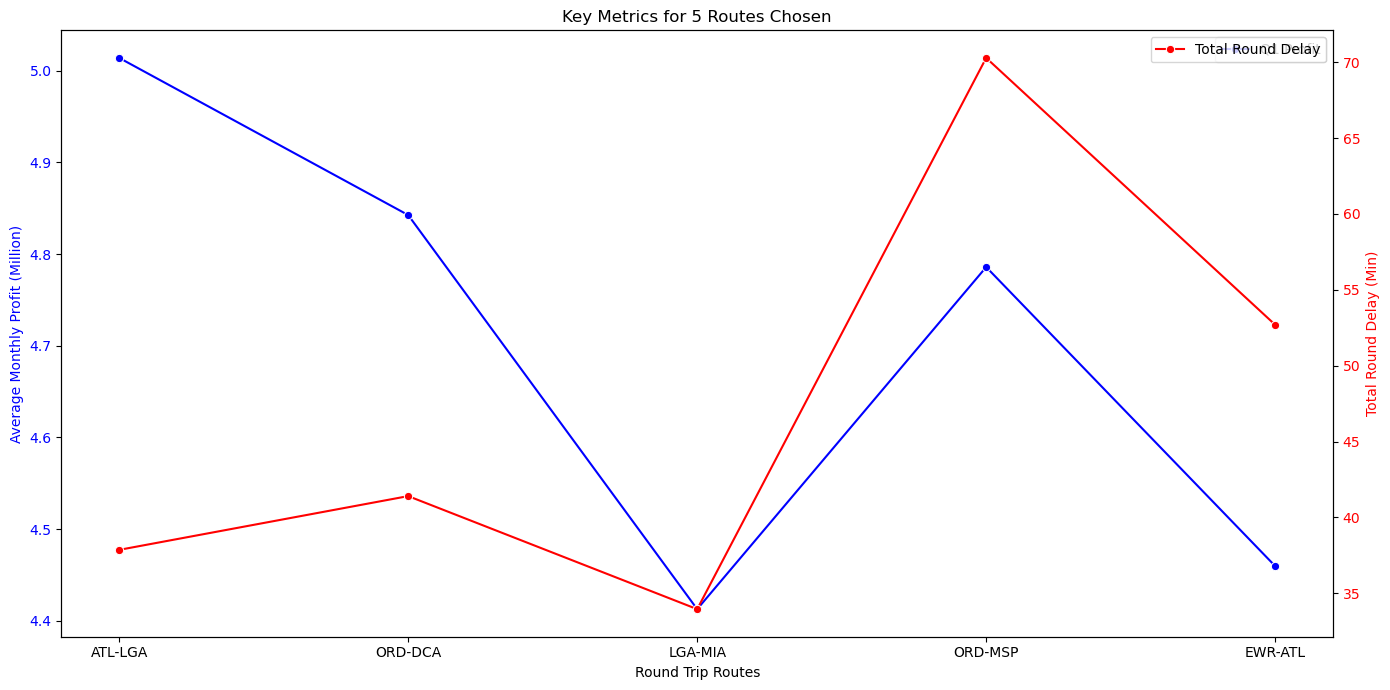

In [1328]:
df = recommend_routes_metrics.copy()
df['ORIGIN_DEST'] = df['ORIGIN'] + '-' + df['DESTINATION']
# Adjust Q1 Profit to be in Million units
df['PROFIT_MONTHLY'] = df['Q1_PROFIT'] / (1e6*3)

# Create a figure with two subplots for Q1 profit and total round delay time separately
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

# Plot for Q1 Profit
sns.lineplot(x='ORIGIN_DEST', y='PROFIT_MONTHLY', data=df, marker='o', label='Q1 Profit', color='blue', ax=ax1)
ax1.set_xlabel('Round Trip Routes')
ax1.set_ylabel('Average Monthly Profit (Million)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot for Total Round Delay
sns.lineplot(x='ORIGIN_DEST', y='TTL_ROUND_DELAY', data=df, marker='o', label='Total Round Delay', color='red', ax=ax2)
ax2.set_ylabel('Total Round Delay (Min)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Key Metrics for 5 Routes Chosen')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()